In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot
print(sys.executable)

/usr/bin/python3


In [2]:
# No beam effects and crossing angle hepmc file: 
# Taken from https://dtn01.sdcc.bnl.gov:9000/minio/eictest/ATHENA/WG/BeamEffects/
no_effects_source = "/home/romanov/eic/data/ab_test/test_headon_18x275.hepmc"

# Full pythia8 with beam effects file: 
# Taken from https://dtn01.sdcc.bnl.gov:9000/minio/eictest/ATHENA/EVGEN/DIS/NC/18x275/minQ2=10/
full_py8_source = "/home/romanov/eic/data/ab_test/pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_1.hepmc"
executable = "/home/romanov/eic/afterburner/cpp/cmake-build-debug/abconv/abconv"
process_limit = 50000

# We compare setups here: 
# 1. No beam effects + afterburner
# 2. Full beam effects (No afterburner obviously)

# Each setup will produce hepmc and .root file + command to run converter/afterburner

# 1. No beam effects run through afterburner
afterburner_out = "afterburner"
afterburner_root = afterburner_out + ".hist.root"
afterburner_cmd = f"{executable} {no_effects_source}  --limit={process_limit} -o {afterburner_out}"

# 2. Full beam effects (No afterburner obviously)
full_py8_out = "full_eff"
full_py8_root = full_py8_out + ".hist.root"
full_py8_cmd = f"{executable} {full_py8_source}   --ab-off --limit={process_limit} -o {full_py8_out}"


The next one will trigger simulations for 1. no effects 

In [3]:
# print("\n\n", no_effects_cmd)
# !{no_effects_cmd}
print("\n\n", afterburner_cmd)
!{afterburner_cmd}
print("\n\n", full_py8_cmd)
!{full_py8_cmd}



 /home/romanov/eic/afterburner/cpp/cmake-build-debug/abconv/abconv /home/romanov/eic/data/ab_test/test_headon_18x275.hepmc  --limit=50000 -o afterburner
Info in deduce_reader: Attempt ReaderRootTree for:  /home/romanov/eic/data/ab_test/test_headon_18x275.hepmc
Info in deduce_reader: Attempt ReaderAscii for:  /home/romanov/eic/data/ab_test/test_headon_18x275.hepmc
Afterburner is ENABLED
Initial beam particles (before afterburner):
   pdg: 2212   p: 0.0, 0.0, 275.0   e:275.0
   pdg: 11   p: 0.0, 0.0, -18.0   e:18.0
   crossing angle: 0 [mrad]
AFTERBURNER CONFIGURATION
Vertex distribution width  x: 0, y: 0, z: 0, t: 0
Vertex distribution function: Gauss
Vertex simulation is: on
Hadron beam:
   direction       : theta = 0.025, phi = 0
   divergence      : hor = 0.00015, ver = 0.00015
   rms emittance   : hor = 1.8e-05, ver = 1.6e-06
   beta star       : hor = 800, ver = 72
   beta crab       : hor = 1.3e+06
   rms bunch length: 60
Lepton beam:
   direction       : theta = 3.14159, phi = 

In [4]:
# !ls -latrh
# !rm *.root *.hepmc

In [5]:
#no_effects_file = uproot.open(no_effects_root)["after"]
#ab_file = uproot.open(afterburner_root)

no_effects_file = uproot.open(afterburner_root)["before"]
afterburner_file = uproot.open(afterburner_root)["after"]
full_py8_file = uproot.open(full_py8_root)["after"]
print(no_effects_file.keys())

files = [no_effects_file, afterburner_file, full_py8_file]
file_titles = ["Nominal (no effects)", "Afterburner", "Pythia8 with beam effects"]

['partPt;1', 'partEta;1', 'partPhi;1', 'partPtVsEta;1', 'partPhiVsEta;1', 'vtxX;1', 'vtxY;1', 'vtxZ;1', 'vtxT;1', 'vtx2X;1', 'vtx2Y;1', 'vtx2Z;1', 'vtx2T;1', 'vtxYvsX;1', 'vtxXvsT;1', 'vtxXvsZ;1', 'vtxYvsZ;1', 'vtxTvsZ;1', 'vtxXvsTZSum;1', 'vtxXvsTZDiff;1']


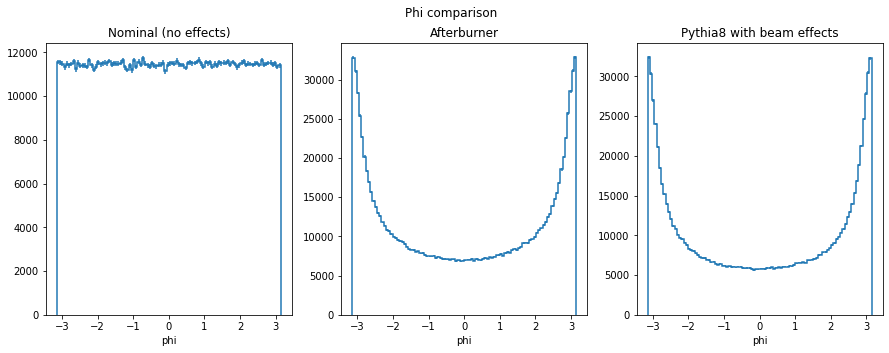

In [6]:
def compare_1d(histo_name, title, x_label, y_label, figsize=(15, 5)):

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(title)
    
    for i, ax in enumerate(axes):
        ax.set_title(file_titles[i])
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        files[i][histo_name].to_hist().plot(ax=ax)
    

compare_1d("partPhi", "Phi comparison", "phi", "")

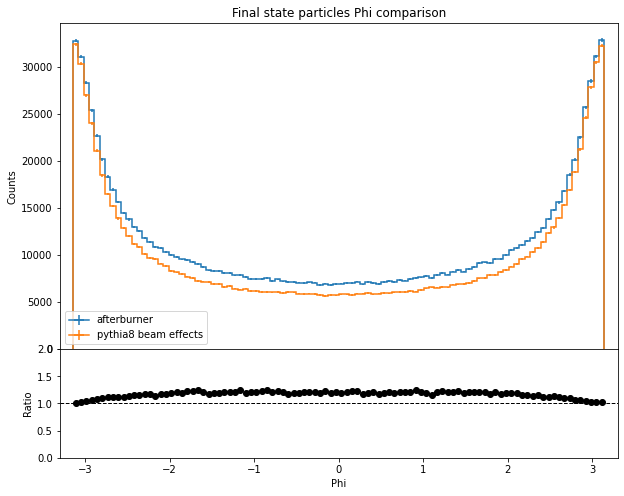

In [7]:
fig = plt.figure(figsize=(10, 8))

ab_phi_hist = afterburner_file['partPhi'].to_hist()
py8_phi_hist = full_py8_file['partPhi'].to_hist()

# Comparison plot
top_art, bottom_art = ab_phi_hist.plot_ratio(
    py8_phi_hist,
    rp_num_label="afterburner",
    rp_denom_label="pythia8 beam effects")

ax = fig.axes[0];
ax.set_title("Final state particles Phi comparison")
bottom_art.line.axes.set_ylim(0, 2)
bottom_art.line.axes.set_xlim(-3.3, 3.3)
bottom_art.line.axes.set_xlabel("Phi")
fig.savefig('pics/phi_comparison.png', dpi=224)


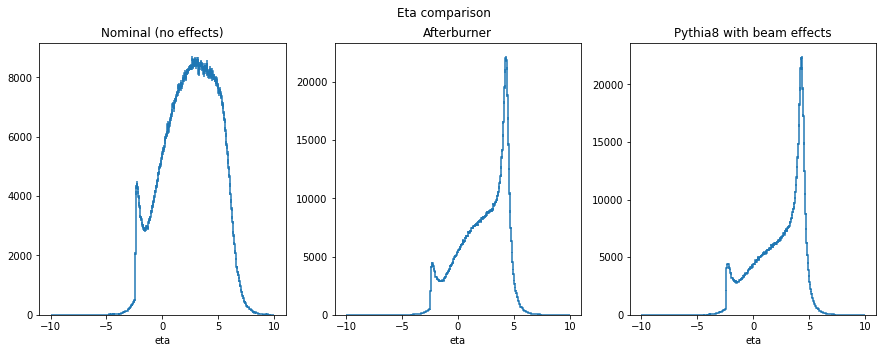

In [8]:
compare_1d('partEta', 'Eta comparison', 'eta', '')

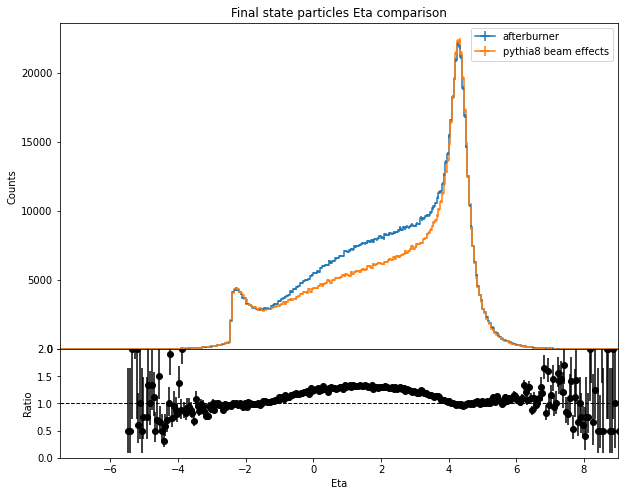

In [9]:
fig = plt.figure(figsize=(10, 8))

ab_eta_hist = afterburner_file['partEta'].to_hist()
py8_eta_hist = full_py8_file['partEta'].to_hist()

# Comparison plot
top_art, bottom_art = ab_eta_hist.plot_ratio(
    py8_eta_hist,
    rp_num_label="afterburner",
    rp_denom_label="pythia8 beam effects")

ax = fig.axes[0];
ax.set_title("Final state particles Eta comparison")
bottom_art.line.axes.set_ylim(0, 2)
bottom_art.line.axes.set_xlim(-7.5, 9)
bottom_art.line.axes.set_xlabel("Eta")
fig.savefig('pics/eta_comparison.png', dpi=224)

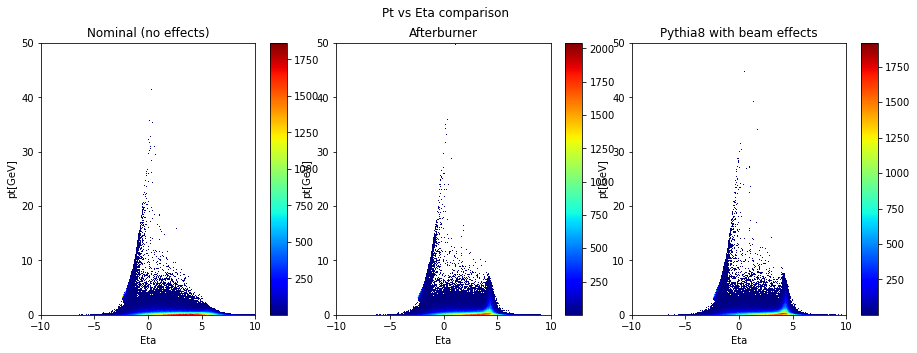

In [10]:
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w',1)

def compare_2d_plots(histo_name, title, x_label, y_label, figsize=(15, 5)):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(title)
    
    ax1.set_title("Nominal (no effects)")
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    no_effects_file[histo_name].to_hist().plot(ax=ax1, vmin=1, cmap=my_cmap)

    ax2.set_title("Afterburner")
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    afterburner_file[histo_name].to_hist().plot(ax=ax2, vmin=1, cmap=my_cmap)

    ax3.set_title("Pythia8 with beam effects")
    ax3.set_xlabel(x_label)
    ax3.set_ylabel(y_label)
    full_py8_file[histo_name].to_hist().plot(ax=ax3, vmin=1, cmap=my_cmap)
    file_name = ('pics/'+title+'.png').replace(' ', '_').lower()
    fig.savefig(file_name, dpi=224)


compare_2d_plots('partPtVsEta', 'Pt vs Eta comparison', 'Eta', 'pt[GeV]')

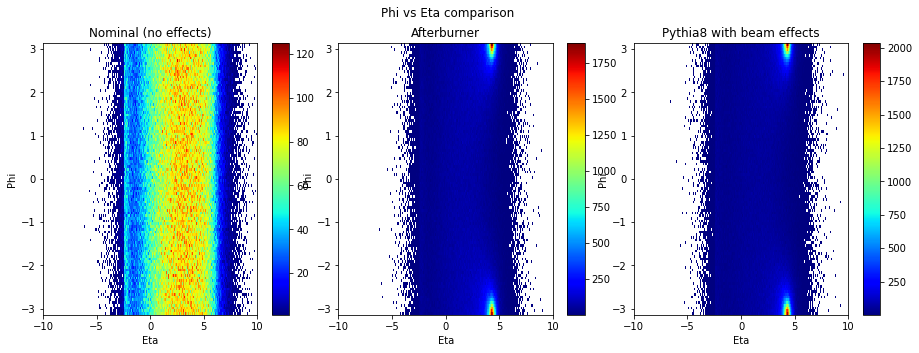

In [11]:
compare_2d_plots('partPhiVsEta', 'Phi vs Eta comparison', 'Eta', 'Phi')

# Beam effects


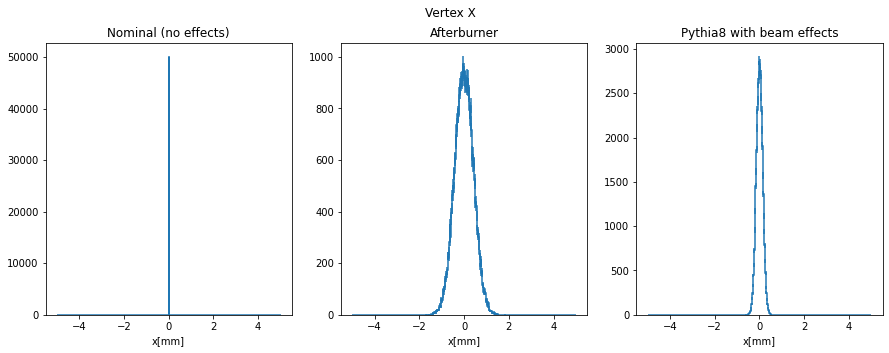

In [12]:
compare_1d("vtxX", "Vertex X", "x[mm]", "")

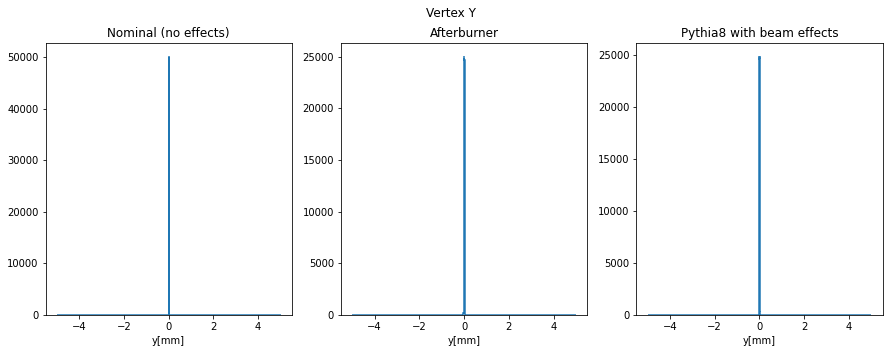

In [13]:
compare_1d("vtxY", "Vertex Y", "y[mm]", "")

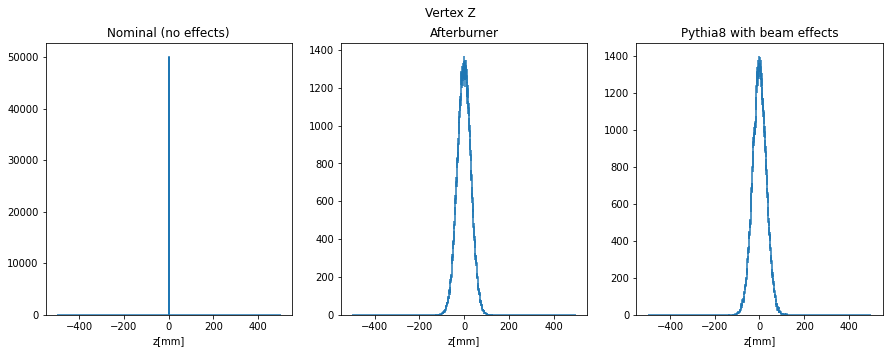

In [14]:
compare_1d("vtxZ", "Vertex Z", "z[mm]", "")

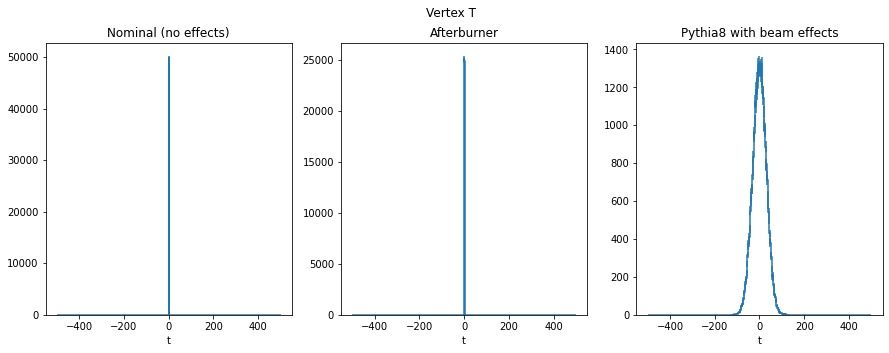

In [15]:
compare_1d("vtxT", "Vertex T", "t", "")

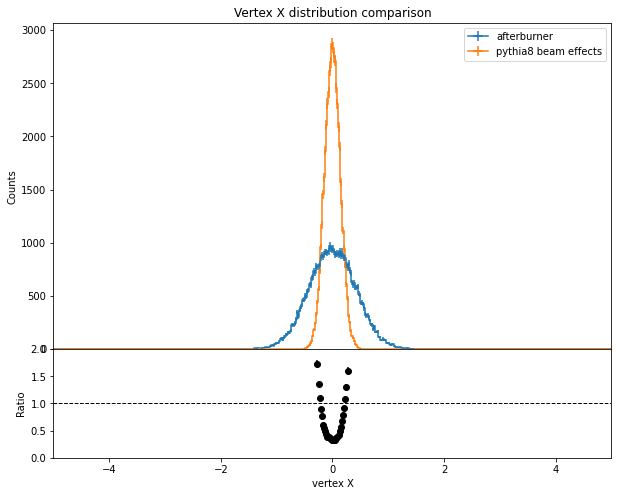

In [16]:
fig = plt.figure(figsize=(10, 8))

ab_eta_hist = afterburner_file['vtxX'].to_hist()
py8_eta_hist = full_py8_file['vtxX'].to_hist()

# Comparison plot
top_art, bottom_art = ab_eta_hist.plot_ratio(
    py8_eta_hist,
    rp_num_label="afterburner",
    rp_denom_label="pythia8 beam effects")

ax = fig.axes[0];
ax.set_title("Vertex X distribution comparison")
bottom_art.line.axes.set_ylim(0, 2)
bottom_art.line.axes.set_xlabel("vertex X")
fig.savefig('pics/vtx_x_comparison.png', dpi=224)

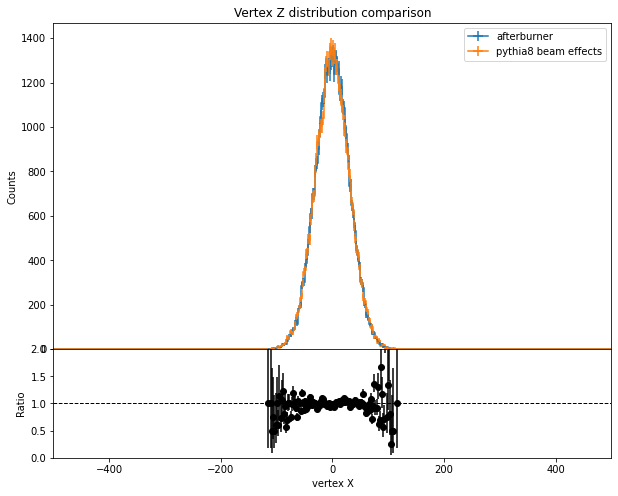

In [17]:
fig = plt.figure(figsize=(10, 8))

ab_eta_hist = afterburner_file['vtxZ'].to_hist()
py8_eta_hist = full_py8_file['vtxZ'].to_hist()

# Comparison plot
top_art, bottom_art = ab_eta_hist.plot_ratio(
    py8_eta_hist,
    rp_num_label="afterburner",
    rp_denom_label="pythia8 beam effects")

ax = fig.axes[0];
ax.set_title("Vertex Z distribution comparison")
bottom_art.line.axes.set_ylim(0, 2)
bottom_art.line.axes.set_xlabel("vertex X")
fig.savefig('pics/vtx_z_comparison.png', dpi=224)

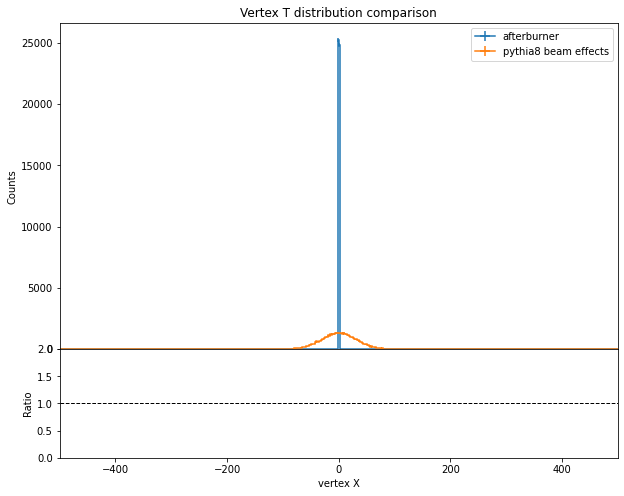

In [18]:
fig = plt.figure(figsize=(10, 8))

ab_eta_hist = afterburner_file['vtxT'].to_hist()
py8_eta_hist = full_py8_file['vtxT'].to_hist()

# Comparison plot
top_art, bottom_art = ab_eta_hist.plot_ratio(
    py8_eta_hist,
    rp_num_label="afterburner",
    rp_denom_label="pythia8 beam effects")

ax = fig.axes[0];
ax.set_title("Vertex T distribution comparison")
bottom_art.line.axes.set_ylim(0, 2)
bottom_art.line.axes.set_xlabel("vertex X")
fig.savefig('pics/vtx_t_comparison.png', dpi=224)